In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("encoded_car_data (1) (1).csv")
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [3]:
# Data preprocessing
#data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)

In [4]:
# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [5]:
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define the models and pipelines
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

In [8]:
# Dictionary to store results
results = {}

In [9]:
# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline with polynomial features and the model
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('regressor', model)
    ])

In [11]:
 # Fit the model
 pipeline.fit(X_train, y_train)

,steps,"[('poly', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True


In [12]:
# Make predictions
predictions = pipeline.predict(X_test)

In [13]:
 # Calculate performance metrics
 mse = mean_squared_error(y_test, predictions)
 r2 = r2_score(y_test, predictions)

In [14]:
 # Store results
 results[name] = {'MSE': mse, 'R² Score': r2}

In [15]:
# Print results
print("Name:Balasurya S")
print("Reg. No:212225100003")
for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']:.2f}, R² Score: {metrics['R² Score']:.2f}")

Name:Balasurya S
Reg. No:212225100003
ElasticNet - Mean Squared Error: 0.63, R² Score: 0.49


In [16]:
# Visualization of the results
# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'}, inplace=True)

In [17]:
# Set the figure size
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

C:\Users\balasurya\AppData\Local\Temp\ipykernel_16928\1013282278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')


([0], [Text(0, 0, 'ElasticNet')])

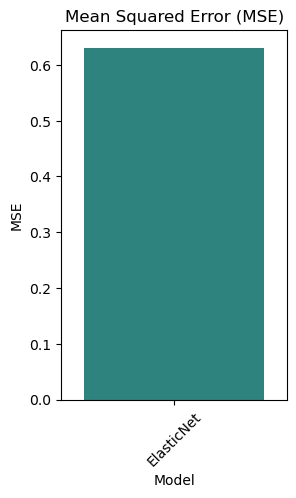

In [18]:
# Bar plot for MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)

C:\Users\balasurya\AppData\Local\Temp\ipykernel_16928\4091929012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis')


([0], [Text(0, 0, 'ElasticNet')])

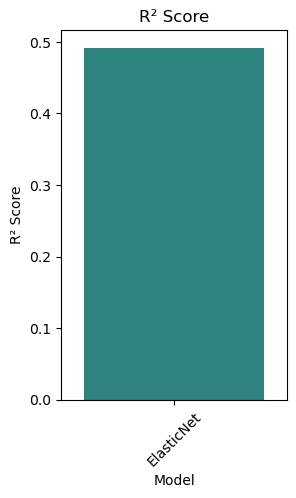

In [19]:
# Bar plot for R² Score
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R² Score', data=results_df, palette='viridis')
plt.title('R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

In [22]:
# Show the plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>